# Introduction to scikit-learn (sklearn)
This the notebook demonstrartes some of thr most useful functions of thr beautiful Scikit-Learn library
what_were_covering =  An end-to-end Scikit-Learn workflo", "1. Getting the data reay"  "2. Choose the right estimator/algorithm for our problms   "3. Fit the model/algorithm and use it to make predictions on our at    "4. Evaluating a od
    "5. Improve am

    "6. Save and load a trainem,
    "7. Putting it all tether!"]

0. an end-to-end Scikit learn workflow

In [124]:
import pandas as pd
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [125]:
# Create X (feature matrix)
x = heart_disease.drop("target",axis =1)

#create y 
y = heart_disease["target"]


In [126]:
#2. choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [127]:
#3 fit the model to the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)


In [128]:
import numpy as np

In [129]:
clf.fit(x_train,y_train);

In [130]:
# make a prediction
y_preds = clf.predict(x_test)

In [131]:
y_preds

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [132]:
y_test

232    0
59     1
278    0
229    0
135    1
      ..
71     1
63     1
115    1
18     1
267    0
Name: target, Length: 61, dtype: int64

In [133]:
#  4 Evaluate the model on training data and the test data
clf.score(x_train,y_train)

1.0

In [134]:
clf.score(x_test,y_test)

0.7868852459016393

In [135]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73        23
           1       0.86      0.79      0.82        38

    accuracy                           0.79        61
   macro avg       0.77      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



In [136]:
confusion_matrix(y_test,y_preds)

array([[18,  5],
       [ 8, 30]], dtype=int64)

In [137]:
accuracy_score(y_test,y_preds)

0.7868852459016393

In [138]:
#5 improve a model 
# try different ammount odf n_estimators
np.random.seed(42)
for i in range(10, 100,10):
    print(f"Trying model with {i} estimators ...")
    clf = RandomForestClassifier(n_estimators = i).fit(x_test,y_test)
    print(f"Model accuracy on test set:{clf.score(x_test,y_test)*100:.2f}%")
    print("")

Trying model with 10 estimators ...
Model accuracy on test set:98.36%

Trying model with 20 estimators ...
Model accuracy on test set:100.00%

Trying model with 30 estimators ...
Model accuracy on test set:100.00%

Trying model with 40 estimators ...
Model accuracy on test set:100.00%

Trying model with 50 estimators ...
Model accuracy on test set:100.00%

Trying model with 60 estimators ...
Model accuracy on test set:100.00%

Trying model with 70 estimators ...
Model accuracy on test set:100.00%

Trying model with 80 estimators ...
Model accuracy on test set:100.00%

Trying model with 90 estimators ...
Model accuracy on test set:100.00%



In [139]:
#6 Save a model and load it.
import pickle

pickle.dump(clf,open("random_forest_model_1.pkl","wb"))

In [140]:
loaded_model = pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(x_test,y_test)

1.0

In [141]:
import sklearn as sk
sk.show_versions()


System:
    python: 3.10.6 (tags/v3.10.6:9c7b4bd, Aug  1 2022, 21:53:49) [MSC v.1932 64 bit (AMD64)]
executable: C:\Users\gaura\AppData\Local\Programs\Python\Python310\python.exe
   machine: Windows-10-10.0.22631-SP0

Python dependencies:
      sklearn: 1.3.2
          pip: 23.3.2
   setuptools: 68.0.0
        numpy: 1.24.3
        scipy: 1.11.3
       Cython: None
       pandas: 2.0.3
   matplotlib: 3.8.1
       joblib: 1.3.2
threadpoolctl: 3.2.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
    num_threads: 8
         prefix: libopenblas
       filepath: C:\Users\gaura\AppData\Local\Programs\Python\Python310\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
        version: 0.3.21
threading_layer: pthreads
   architecture: SkylakeX

       user_api: openmp
   internal_api: openmp
    num_threads: 8
         prefix: vcomp
       filepath: C:\Users\gaura\AppData\Local\Programs\Python\Python310\Lib\site-packages\sklearn\

## 1. Getting our data ready to bre used with machine learning 

Three main things we have to do:

    1. Split the data into features and labels (usually `X` & `Y`)
    2. Filling (also called imputing ) or disregarding missing values
    3. Converting non numericals vaules to numericals values

In [142]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [143]:
x = heart_disease.drop("target",axis=1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [144]:
y = heart_disease["target"]

In [145]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [146]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [147]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [148]:
x.shape

(303, 13)

In [149]:
x_train.shape

(242, 13)

In [150]:
x_test.shape

(61, 13)

In [151]:
len(heart_disease)

303

### 1.1 Make sure the data is numerical


In [152]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
5,Honda,Red,42652,4,23883
6,Toyota,Blue,163453,4,8473
7,Honda,White,43120,4,20306
8,Nissan,White,130538,4,9374
9,Honda,Blue,51029,4,26683


In [153]:
len(car_sales)

1000

In [154]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [155]:
# split the the data sets
x = car_sales.drop("Price",axis=1)
y = car_sales["Price"]

#split into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [156]:
#build teh machine learning model
from sklearn.ensemble import RandomForestRegressor



In [157]:
# tURNING CATEGORIES INTO NUMBERS
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                               one_hot,
                               categorical_features)],
                               remainder="passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [158]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [159]:
 #another way to convert them into numericals
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [160]:
# let try to refit the model
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(transformed_x,y,test_size=0.2)
model = RandomForestRegressor()
model.fit(x_train,y_train)


RandomForestRegressor()

In [161]:
model.score(x_test,y_test)

0.3235867221569877

In [162]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [163]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [164]:
#filling the missing data
car_sales_missing["Make"].fillna("missing",inplace=True)
car_sales_missing["Colour"].fillna("missing",inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)
car_sales_missing["Doors"].fillna(4,inplace=True)

In [165]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [166]:
#remove the rows with the missing values
car_sales_missing.dropna(inplace=True)

In [167]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [168]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [169]:
len(car_sales_missing)

950

In [170]:
x = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [171]:
# tURNING CATEGORIES INTO NUMBERS
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                               one_hot,
                               categorical_features)],
                               remainder="passthrough")
transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2. filling the missing values with the scikit learn

In [172]:
car_missing_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_missing_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [173]:
car_missing_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [174]:
# Drop the rows with no labels
car_missing_missing.dropna(subset=["Price"],inplace=True)
car_missing_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [175]:
# Split into X and Y
x = car_missing_missing.drop("Price",axis=1)
y = car_missing_missing["Price"]

In [176]:
# Fill missing values with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# FIll categorical values with "missing" & numerical values with mean 
cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant",fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define Columns
cat_features = ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (Something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features)
])

# Transform the data
filled_X = imputer.fit_transform(x)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [177]:
car_sales_filled = pd.DataFrame(filled_X,columns = ["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [178]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [179]:
# tURNING CATEGORIES INTO NUMBERS
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                               one_hot,
                               categorical_features)],
                               remainder="passthrough")
transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [180]:
# Now we have got the numbers without the missing values 
# now create a model
#now fit the model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(transformed_x,y,test_size=0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.21990196728583944

In [181]:
len(car_sales_filled), len(car_sales)

(950, 1000)

## 2. Choosing the right estimators/algorithm for your problems

* Scikit-Learn refers to machine learning models and algorithms as estimators.
* Classification problem - predicting a category (heart disease or not).
  * Sometimes you'll see clf (short for classifier) used as a classification estimator instance's variable name.
* Regression problem - predicting a number (selling price of a car).
* Unsupervised problem (data with no labels) - clustering (grouping unlabelled samples with other similar unlabelled samples).

In [182]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing 

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [183]:
housing_df = pd.DataFrame(housing["data"],columns = housing["feature_names"])
housing_df["target"] = pd.Series(housing["target"])
housing_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [184]:
housing_df["MedHouseVal"] = housing_df["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,0.847


In [185]:
housing_df = housing_df.drop('MedHouseVal', axis=1)

In [186]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [187]:
#import a algorithm/estimator
from sklearn.linear_model import Ridge

#creating a model 
np.random.seed(42)

#create the data
X = housing_df.drop("target",axis=1)
Y = housing_df["target"]

#split the data into train and test sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

#instantiate and fit the model
model = Ridge()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.5758549611440127

In [188]:
#import a regressor model via ensemble if the ridge doesnt work
from sklearn.ensemble import RandomForestRegressor

np.random.seed(40)
X = housing_df.drop("target",axis=1)
Y = housing_df["target"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.8006294256979274

### 2.2 Picking a machine learning model for classificaton

In [189]:
heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [190]:
len(heart_disease)

303

In [191]:
# now look at the map and choose the model
#it says linearSVC
from sklearn.svm import LinearSVC

np.random.seed(40)
X = heart_disease.drop("target",axis=1)
Y = heart_disease["target"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
clf = LinearSVC(max_iter=100000)
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

C:\Users\gaura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\gaura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9016393442622951

In [192]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [193]:
# now look at the map and choose the model
from sklearn.ensemble import RandomForestClassifier

np.random.seed(40)
X = heart_disease.drop("target",axis=1)
Y = heart_disease["target"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
clf = RandomForestClassifier(n_estimators =100)
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

0.8032786885245902

Tidbit:
1. If you have structured data, use ensemble methods
2. If you have unstructued data, use deep leraning or transfer learning

## 3.Fit the model/algorithm and use it to make prediction   
### 3.1 Fitting the model to the data

* `X` = features,feauturs variables,data
* `Y` = labels,target,target variables


In [194]:
# import the Random Forest Claasifier
from sklearn.ensemble import RandomForestClassifier
#setup random seed
np.random.seed(40)

#make the data
X = heart_disease.drop("target",axis=1)
Y = heart_disease["target"]

#split the data into training and testing
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
#instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators =100)
# fit the model to the data (training thr machine learning model)
clf.fit(X_train,Y_train)
#Evaluate the Random Forest classifier (use the patterns model has learned)
clf.score(X_test,Y_test)

0.8032786885245902

In [195]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 make predictions on ml models
 2 ways to predict functions
 1. `predict()`
 2. `predict_proba()`

In [196]:
# use  atrained model to make the predictions
clf.predict(X_test)

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [197]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == Y_test)

0.8032786885245902

In [198]:
clf.score(X_test,Y_test)

0.8032786885245902

In [199]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_preds)

0.8032786885245902

# Make predictions with `predict_proba()`


In [200]:
#predict_prob() returns the probabilities of a classification label 
clf.predict_proba(X_test[:5])

array([[0.3 , 0.7 ],
       [0.61, 0.39],
       [0.42, 0.58],
       [0.8 , 0.2 ],
       [0.12, 0.88]])

In [201]:
#lets predict() on the same data...
clf.predict(X_test[:5])

array([1, 0, 1, 0, 1], dtype=int64)

`predict()` can also be used for regression models

In [202]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [203]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X = housing_df.drop('target',axis =1)
Y = housing_df['target']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

model=RandomForestRegressor(n_estimators=100)
model.fit(X_train,Y_train)
y_preds = model.predict(X_test)
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [204]:
# compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test,y_preds)

0.32659871732073664

### 4. Evaluating a machine learning model

Three ways to evaluate scikit-learn models/estimators:
1. Estimator's built-in `score()`method
2. The `scoring` parameter
3. Problem-specific metric functions

In [205]:
### 4.1 Evaluating using score() method
# import the Random Forest Claasifier
from sklearn.ensemble import RandomForestClassifier
#setup random seed
np.random.seed(40)

#make the data
X = heart_disease.drop("target",axis=1)
Y = heart_disease["target"]

#split the data into training and testing
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
#instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators =100)
# fit the model to the data (training thr machine learning model)
clf.fit(X_train,Y_train)
#Evaluate the Random Forest classifier (use the patterns model has learned)
clf.score(X_test,Y_test)

0.8032786885245902

In [206]:
###4.2 Eval using scoring method
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
#setup random seed
np.random.seed(40)

#make the data
X = heart_disease.drop("target",axis=1)
Y = heart_disease["target"]

#split the data into training and testing
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
#instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators =100)
# fit the model to the data (training thr machine learning model)
clf.fit(X_train,Y_train)
#Evaluate the Random Forest classifier (use the patterns model has learned)
clf.score(X_test,Y_test)

0.8032786885245902

In [207]:
cross_val_score(clf,X,Y)

array([0.83606557, 0.86885246, 0.7704918 , 0.8       , 0.76666667])

In [208]:
np.mean(cross_val_score(clf,X,Y))

0.8150273224043716

### 4.2.1 Classification model evaluation metrics
## Four of the main evaluation metrics/methods you'll come across for classification models are:
1. Accuracy
2. Area under ROC curve (receiver operating characteristic curve)
3. Confusion matrix
4. Classification report

**Accuracy**

In [209]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
#setup random seed
np.random.seed(40)

#make the data
X = heart_disease.drop("target",axis=1)
Y = heart_disease["target"]
#instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators =100)
cross_val_score = cross_val_score(clf,X,Y)

In [210]:
np.mean(cross_val_score)

0.8084699453551913

In [211]:
# Accuracy as percentage
print(f"Heart Disease cross val classifier Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease cross val classifier Accuracy: 80.85%


**Area under the receiver operating characteristic curve (AUC/ROC)**
* Area Under Curve (AUC)
* ROC curve

ROC curves are a comparison of true postive rate (tpr) versus false positive rate (fpr).

For clarity:
* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [212]:
#split the data into training and testing
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
#instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators =100)
clf.fit(X_train,Y_train)
from sklearn.metrics import roc_curve
y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.55, 0.45],
       [0.16, 0.84],
       [0.76, 0.24],
       [0.12, 0.88],
       [0.44, 0.56],
       [0.16, 0.84],
       [0.65, 0.35],
       [0.04, 0.96],
       [0.52, 0.48],
       [0.04, 0.96]])

In [213]:
y_probs_positive = y_probs[ : ,1]
y_probs_positive[:10]

array([0.45, 0.84, 0.24, 0.88, 0.56, 0.84, 0.35, 0.96, 0.48, 0.96])

In [214]:
#calculate fpr,tpr and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_probs_positive)
#check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03571429,
       0.03571429, 0.07142857, 0.07142857, 0.07142857, 0.10714286,
       0.14285714, 0.14285714, 0.21428571, 0.25      , 0.25      ,
       0.28571429, 0.32142857, 0.32142857, 0.42857143, 0.5       ,
       0.60714286, 0.60714286, 0.75      , 0.85714286, 0.89285714,
       0.96428571, 1.        ])

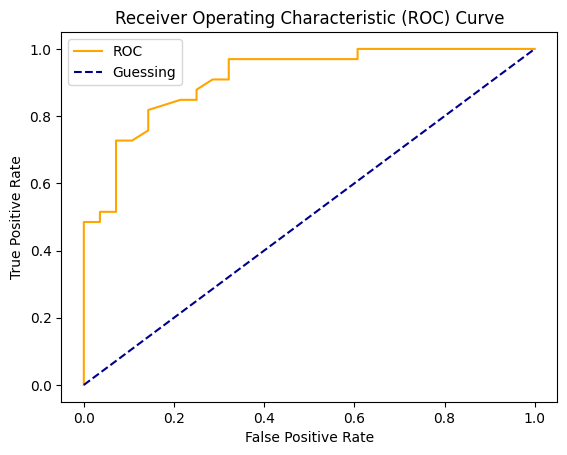

In [215]:
# create a function for plotting roc curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color="orange",label="ROC")
    plt.plot([0,1],[0,1], color="darkblue",linestyle="--",label ="Guessing")
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [216]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test,y_probs_positive)

0.9123376623376623

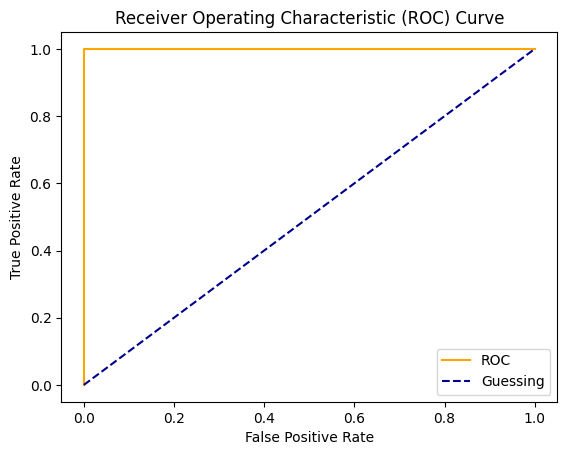

In [217]:
# plot perfect ROC curve and AUC score
fpr,tpr,thresholds = roc_curve(Y_test,Y_test)
plot_roc_curve(fpr,tpr)

In [218]:
#perfect AUC score
roc_auc_score(Y_test,Y_test)

1.0

**Confusion matrix**

A confusion matrix is aquick way to compare the labels a predicts and the actual labesl it was supposed to peredict.
In essence, giving you the idea of where the model is getting confused.

In [219]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(Y_test,y_preds)

array([[22,  6],
       [ 5, 28]], dtype=int64)

In [220]:
# visualize confusion matrix with `pd.crosstab()`
pd.crosstab(Y_test,y_preds,rownames = ["Actual Label"],colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,22,6
1,5,28


In [221]:
import sys
pip install --yes --prefix {sys.prefix} seaborn

SyntaxError: invalid syntax (3230008051.py, line 2)

# make a confusion matrix more visualize using Seaborn's heatmap()
import seaborn as sns
#set the font scale
sns.set(font_scale=1.5)
#create a 
conf_mat = confusion_matrix(Y_test,y_preds)

sns.heatmap(conf_mat)

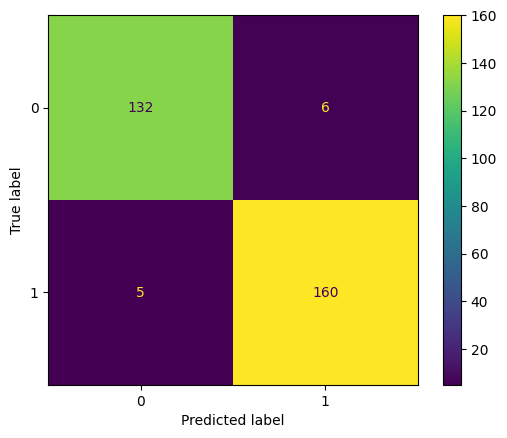

In [222]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator = clf,X=X,y=Y)

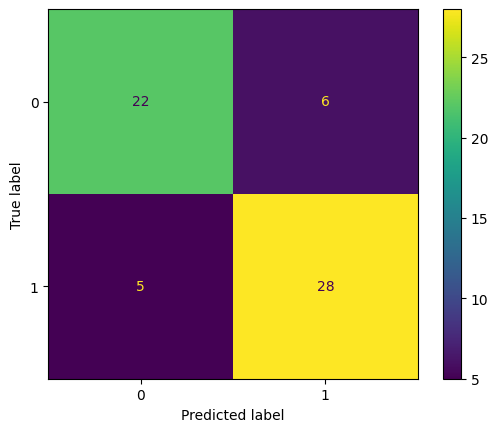

In [223]:
    ConfusionMatrixDisplay.from_predictions(y_true = Y_test,y_pred = y_preds)

**Classification Report**

In [224]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.82      0.85      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



### 4.2.2 Regression model evaluation metrics
* MSE
* MAE
* r-2 score

In [225]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X = housing_df.drop('target',axis =1)
Y = housing_df['target']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

model=RandomForestRegressor(n_estimators=100)
model.fit(X_train,Y_train)
y_preds = model.predict(X_test)
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [226]:
Y_test.mean()

2.0550030959302323

In [227]:
from sklearn.metrics import r2_score
# fill an arrayb with y_test mean
y_test_mean = np.full(len(Y_test),Y_test.mean())

In [228]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [229]:
r2_score(y_true=Y_test,
        y_pred = y_test_mean)

0.0

In [231]:
r2_score(y_true=Y_test,
        y_pred = Y_test)

1.0

**Mean Absolute error (MAE)**


Mae is the avg of the abs differences btwn predictions and actual values.
It gives you an idea of how wrong your models predictions are.

In [232]:
#MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(Y_test,y_preds)
mae

0.32659871732073664

In [233]:
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [236]:
df = pd.DataFrame(data = {"actual values":Y_test,
                         "predicted values":y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head()

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240


In [234]:
Y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

**Mean Squared Error (MSE)**

MSE is the mean of the sqaure of the errors bw actual and predicted values

In [238]:
#MAE
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,y_preds)

0.2534678520824551

In [240]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [241]:
squared = np.square(df["differences"])

squared.mean()

0.2534678520824551

In [243]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [244]:
df_large_error['squared_differences'].mean()

0.2573437523766412

In [245]:
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [246]:
df_large_error['squared_differences'].mean()

0.7334180712088106

### 4.2.3 Finally using scoring parameter

In [248]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target',axis =1)
y = heart_disease['target']

clf = RandomForestClassifier(n_estimators=100)

In [251]:
np.random.seed(42)

# Cross-validation accuracy
cv_ac = cross_val_score(clf,X,y,cv=5)
cv_ac

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [252]:
#Cross-validated accuracy 
print(f"crss validated accuracy : {np.mean(cv_ac)*100:.2f}%")

crss validated accuracy : 82.48%


In [253]:
np.random.seed(42)
cv_ac = cross_val_score(clf,X,y,cv=5,scoring='accuracy')
cv_ac

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [254]:
print(f"crss validated accuracy : {np.mean(cv_ac)*100:.2f}%")

crss validated accuracy : 82.48%


In [255]:
#precision
cv_precision = cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision

array([0.76315789, 0.90322581, 0.83870968, 0.79411765, 0.74358974])

In [261]:
#cross validated precision
np.random.seed(42)
print(f"crss validated precision : {np.mean(cv_precision)*100:.2f}%")

crss validated precision : 80.86%


In [262]:
#Recall
np.random.seed(42)
cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [263]:
#cross validated recall
print(f"crss validated recall : {np.mean(cv_recall)*100:.2f}%")

crss validated recall : 85.45%


lets see the `scoring` parameter being for a regression model

In [267]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X = housing_df.drop('target',axis =1)
Y = housing_df['target']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

model=RandomForestRegressor(n_estimators=100)

In [269]:
np.random.seed(42)
cv_r2 = cross_val_score(model,X,Y,cv =3)
np.mean(cv_r2)

0.6545458023124507

## 4.3 Using different evaluation metrics as sci-kit learn function

In [272]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target',axis =1)
Y = heart_disease['target']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,Y_train)
y_preds = clf.predict(X_test)
print(accuracy_score(Y_test,y_preds))
print(precision_score(Y_test,y_preds))
print(recall_score(Y_test,y_preds))
print(f1_score(Y_test,y_preds))

0.8524590163934426
0.8484848484848485
0.875
0.8615384615384615


In [275]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X = housing_df.drop('target',axis =1)
Y = housing_df['target']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

model=RandomForestRegressor(n_estimators=100)
model.fit(X_train,Y_train)
y_preds = model.predict(X_test)
print(r2_score(Y_test,y_preds))
print(mean_absolute_error(Y_test,y_preds))
print(mean_squared_error(Y_test,y_preds))

0.8065734772187598
0.32659871732073664
0.2534678520824551


### 5. Improving a model

first predictions = baseline predictions;
first model = baseline model;

from a data perspective :
* could we collect more data?
* could we improve our data?

from a model perspective :
* could we use a better model?
* could we improve the current model?

Hyperparameters vs. Parameters
* parameters = model find these patterns in data
* hyperparameters = setting on a model you can adjust to (potentially) improve its ability to find patterns 

In [276]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

 ## 5.1 Tuning hyperparameter with hand


In [277]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

And we are to going to adjust:
* `max_depth`
* `max_feature`
* `max_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [283]:
def evaluate_preds(y_true : np.array,
                  y_preds: np.array) -> dict:
    """
    performs evaluation comparison on y_true labrls vs. y_pred labels.
    return several metrics in the form of a dictionary
    """
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = {"Accuracy" : round(accuracy,2),
                  "Precision" : round(precision,2),
                  "Recall" : round(recall,2),
                  "f1" : round(f1,2)}
    print(f"Acc : {accuracy*100:.2f}%")
    print(f"Precision : {precision*100:.2f}%")
    print(f"Recall : {recall*100:.2f}%")
    print(f"f1 : {f1*100:.2f}%")

    return metric_dict

In [284]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target',axis =1)
Y = heart_disease['target']

#Training and test split (70% train,30% test)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)
# Create validation and test split by spliting testing data in half ( 30% -> 15% validation , 15% test) 
X_valid,X_test,Y_valid,Y_test = train_test_split(X_test,Y_test,test_size=0.5)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,Y_train)
y_preds = clf.predict(X_valid)

# evaluate the classifier
baseline_metrics = evaluate_preds(Y_valid , y_preds)
baseline_metrics

Acc : 80.00%
Precision : 77.78%
Recall : 87.50%
f1 : 82.35%


{'Accuracy': 0.8, 'Precision': 0.78, 'Recall': 0.88, 'f1': 0.82}

In [289]:
np.random.seed(42)
# create a second classifier with different hyperaparameters
clf_2 = RandomForestClassifier(n_estimators=300, max_depth=10)
clf_2.fit(X_train,Y_train)

# make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(Y_valid, y_preds_2)

Acc : 80.00%
Precision : 80.00%
Recall : 83.33%
f1 : 81.63%


### 5.2 Hyperparameter tuning with `RandomizedSearchCV`

In [299]:
from sklearn.model_selection import RandomizedSearchCV
grid = {"n_estimators":[10, 100, 200, 500, 1000, 1200],
        "max_depth":[None, 5, 10, 20, 30],
        "max_features": ["sqrt", "log2", None],
        "min_samples_split": [2, 4, 6, 8],
        "min_samples_leaf": [1, 2, 4, 8]}

np.random.seed(42)

X = heart_disease.drop('target',axis =1)
Y = heart_disease['target']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)
#Randomized search CV
rs_clf  = RandomizedSearchCV(estimator = clf,
                            param_distributions=grid,
                            n_iter = 10,# number of model to try
                            cv=5,
                            verbose=2)
rs_clf.fit(X_train,Y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   3.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   3.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   3.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   3.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   3.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_est

In [300]:
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 20}

In [301]:
# make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

#evaluate the predictions
rs_metrics = evaluate_preds(Y_test,rs_y_preds)

Acc : 86.89%
Precision : 85.29%
Recall : 90.62%
f1 : 87.88%


 ### 5.3 Hyperparameter tuning with `GridSearchCV`

In [302]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_split': [2, 4, 6, 8],
 'min_samples_leaf': [1, 2, 4, 8]}

In [303]:
grid_2 = {'n_estimators': [100, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_split': [4, 6, 8],
 'min_samples_leaf': [2, 4, 8]}

In [305]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set n_jobs to -1 to use all available machine cores (if this produces errors, try n_jobs=1)
clf = RandomForestClassifier(n_jobs=-1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=

In [307]:
gs_clf.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 100}

In [308]:
# Max predictions with the GridSearchCV classifier
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)
gs_metrics

Acc : 85.25%
Precision : 84.85%
Recall : 87.50%
f1 : 86.15%


{'Accuracy': 0.85, 'Precision': 0.85, 'Recall': 0.88, 'f1': 0.86}

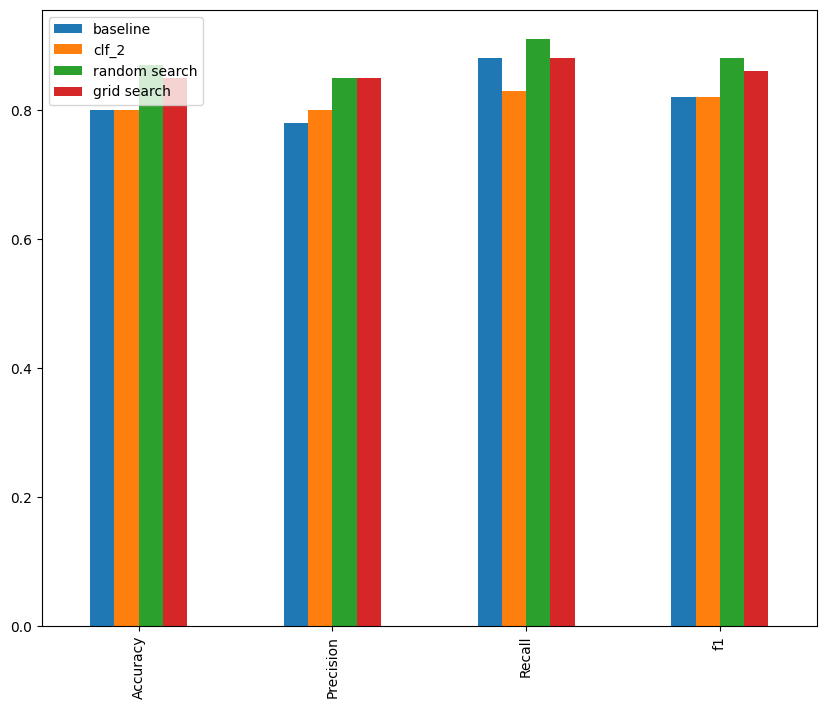

In [309]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10, 8));

### 6. Sacving and load machine learning model
Two ways to save load ml models:
1. With `pickle` module
2. with thw `joblib` module

In [310]:
import pickle

#save an exixting model to file
pickle.dump(gs_clf,open("gs_random_forest_1.pkl","wb"))

In [313]:
loaded_pickle_model = pickle.load(open("gs_random_forest_1.pkl","rb"))

In [314]:
pickle_y_preds = loaded_pickle_model.predict(X_test)
loaded_pickle_model_metrics = evaluate_preds(y_test, pickle_y_preds)
loaded_pickle_model_metrics

Acc : 85.25%
Precision : 84.85%
Recall : 87.50%
f1 : 86.15%


{'Accuracy': 0.85, 'Precision': 0.85, 'Recall': 0.88, 'f1': 0.86}

In [315]:
from joblib import dump, load

# Save a model to file
best_model_file_name_joblib = "gs_random_forest_model_1.joblib"
dump(gs_clf, filename=best_model_file_name_joblib) 

['gs_random_forest_model_1.joblib']

In [316]:
# Import a saved joblib model
loaded_joblib_model = load(filename=best_model_file_name_joblib)

In [317]:
# Make and evaluate joblib predictions 
joblib_y_preds = loaded_joblib_model.predict(X_test)
loaded_joblib_model_metrics = evaluate_preds(y_test, joblib_y_preds)
loaded_joblib_model_metrics

Acc : 85.25%
Precision : 84.85%
Recall : 87.50%
f1 : 86.15%


{'Accuracy': 0.85, 'Precision': 0.85, 'Recall': 0.88, 'f1': 0.86}

### 7. Putting it all together

In [318]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [320]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [323]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#Modellimg
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

#setting up random seed
import numpy as np
np.random.seed(42)

# import the evaluation
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# import data and drop rows with missing labels
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace = True)

# Define different features and transformer pipelines
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features)])

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor(n_jobs=-1))])
# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

In [325]:
# Using grid search with pipeline
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"], # note the double underscore after each prefix "preprocessor__"
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(estimator = model, param_grid =pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model',
                                        RandomForestRegressor(n_jobs=-1))]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [326]:
gs_model.score(X_train,y_train)

0.43337001091119687